In [2]:
# -*- coding: utf-8 -*-
from __future__ import unicode_literals

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns

%matplotlib inline

## Данные
загружаем данные по стерлитамаку

In [4]:
data = pd.read_csv('salavat.csv', encoding='utf-8')
data.rename(columns=lambda x: x[5:], inplace=True)

In [5]:
data.head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,565,542,791,641,627,465,560,1792,579,421,740,341
1,2159,3024,2096,2563,2113,4154,2971,3479,3493,2840,1476,2832
2,1162,1519,970,1295,1110,2071,1514,1686,1728,1469,1127,1430


In [6]:
golosa = data.sum().reset_index()
golosa = golosa.set_index('index')
golosa.head()

,0
index,
1,3886
2,5085
3,3857
4,4499
5,3850


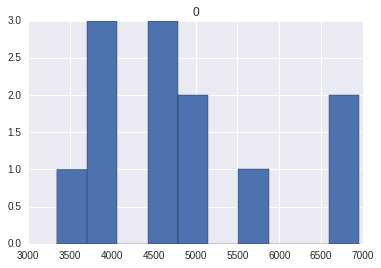

In [7]:
golosaplot = golosa.hist()
# golosaplot.set_title(u"Kolichestvo Golosov po uchastkam")

Распределение голосов по участкам, Медиана: 1254 голоса на участке, в среднем 469 голоса на участок

In [6]:
# data = data[data>50]
# data.head()

In [8]:
data_percent = data.apply(lambda x: (x*100 / x.sum()))
data_percent.head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,14.539372,10.658800,20.508167,14.247611,16.285714,6.950673,11.100099,25.758229,9.982759,8.900634,22.135806,7.408212
1,55.558415,59.469027,54.342753,56.968215,54.883117,62.092676,58.889990,50.007187,60.224138,60.042283,44.151959,61.525092
2,29.902213,29.872173,25.149080,28.784174,28.831169,30.956652,30.009911,24.234584,29.793103,31.057082,33.712235,31.066696


In [10]:
edro = data_percent.transpose()[[1]]
edro = edro.sort_values(by=[1], ascending=[False])
edro = edro.rename(columns={1: 'EDRO'})
edro.describe()

,EDRO
count,12.000000
mean,56.512904
std,5.226474
min,44.151959
25%,54.748026
50%,57.929103
75%,60.087747
max,62.092676


### Участки с большими процентами за едро
http://www.bashkortostan.vybory.izbirkom.ru/bashkortostan/ik/4024049178662

In [11]:
edro.head(5)

,EDRO
6,62.092676
12,61.525092
9,60.224138
10,60.042283
2,59.469027


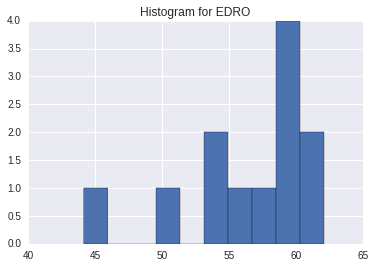

In [12]:
edro.hist()
plt.title('Histogram for EDRO')

Гистограма показывает что на большинстве участков близкое значение в 56%

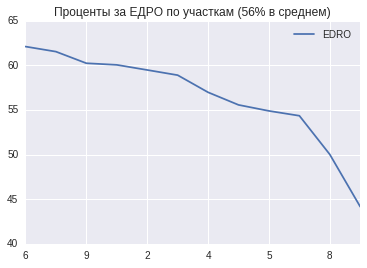

In [13]:
edro.plot(title=u'Проценты за ЕДРО по участкам (56% в среднем)')


Медиана в 56% почти на всех участках... причем настолько ровное распределение соотношения голосов за Единую России, вызывает удивление.

In [14]:
edro['golosa']=golosa
edro.head()

,EDRO,golosa
6,62.092676,6690
12,61.525092,4603
9,60.224138,5800
10,60.042283,4730
2,59.469027,5085


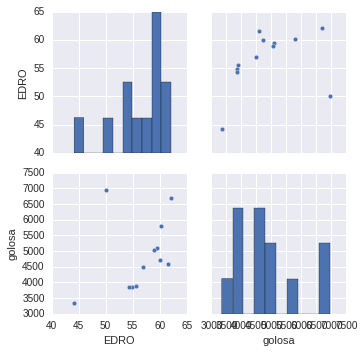

In [15]:
sns.pairplot(edro)

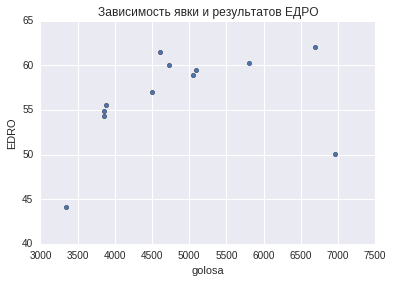

In [16]:
edro.plot.scatter(x='golosa', y='EDRO', title=u'Зависимость явки и результатов ЕДРО')